In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
url = "./sample_data/CovidData.csv"
data = pd.read_csv(url)


In [5]:
# Perform various preprocessing and data wrangling operations here:

# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# 3. Convert date column to datetime format
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], errors='coerce')

# 4. Filter data based on a condition (e.g., only patients who died)
died_data = data[data['DATE_DIED'].notnull()]

# 5. Calculate age groups
data['age_group'] = pd.cut(data['AGE'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# 6. Group data by a specific column and aggregate
grouped_data = data.groupby('age_group').agg({'DIABETES': 'sum', 'COPD': 'sum', 'ASTHMA': 'sum', 'HIPERTENSION': 'sum', 'CARDIOVASCULAR': 'sum', 'OBESITY': 'sum', 'RENAL_CHRONIC': 'sum', 'TOBACCO': 'sum'})


/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/05/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/07/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [8]:
# Perform various preprocessing and data wrangling operations here:

# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# 3. Convert date column to datetime format
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], errors='coerce')

# 4. Filter data based on a condition (e.g., only patients who died)
died_data = data[data['DATE_DIED'].notnull()]

# 5. Calculate age groups
data['age_group'] = pd.cut(data['AGE'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# 6. Group data by a specific column and aggregate
grouped_data = data.groupby('age_group').agg({'DIABETES': 'sum', 'COPD': 'sum', 'ASTHMA': 'sum', 'HIPERTENSION': 'sum', 'CARDIOVASCULAR': 'sum', 'OBESITY': 'sum', 'RENAL_CHRONIC': 'sum', 'TOBACCO': 'sum'})

In [9]:
# Answer different constructive questions based on your data:

# 1. What is the total number of deaths in the dataset?
total_deaths = len(died_data)

# 2. What is the distribution of deaths by age group?
deaths_by_age = died_data['age_group'].value_counts()

# 3. What is the distribution of deaths by sex?
deaths_by_sex = died_data['SEX'].value_counts()

# 4. What are the most common comorbidities among deceased patients?
comorbidities = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
comorbidities_count = died_data[comorbidities].sum()


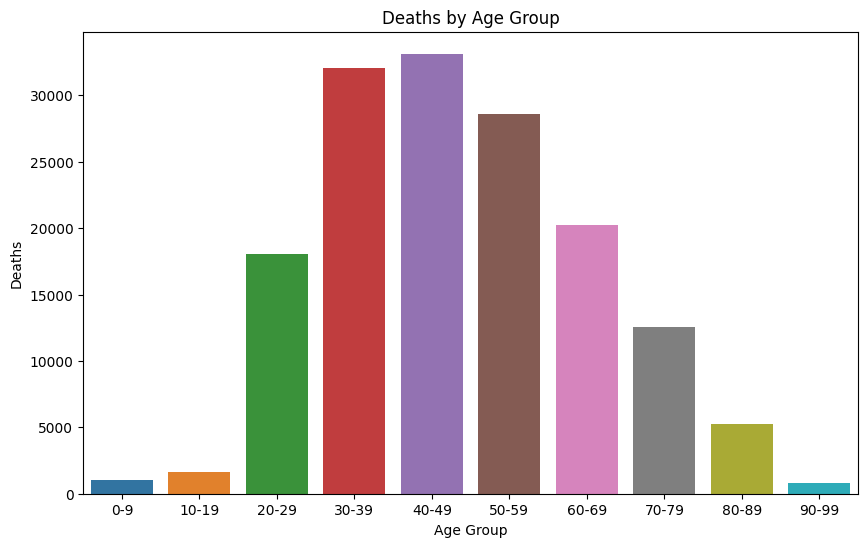

In [12]:
# 1. Plot the distribution of deaths by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_by_age.index, y=deaths_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.title('Deaths by Age Group')
plt.show()

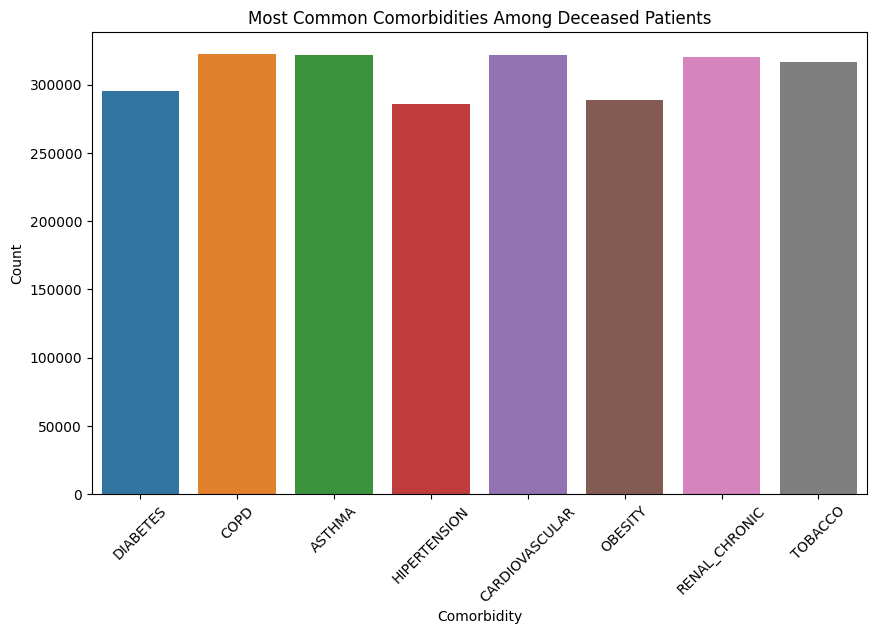

In [17]:
# 2. Plot the most common comorbidities among deceased patients

plt.figure(figsize=(10, 6))
sns.barplot(x=comorbidities_count.index, y=comorbidities_count.values)
plt.xlabel('Comorbidity')
plt.ylabel('Count')
plt.title('Most Common Comorbidities Among Deceased Patients')
plt.xticks(rotation=45)
plt.show()

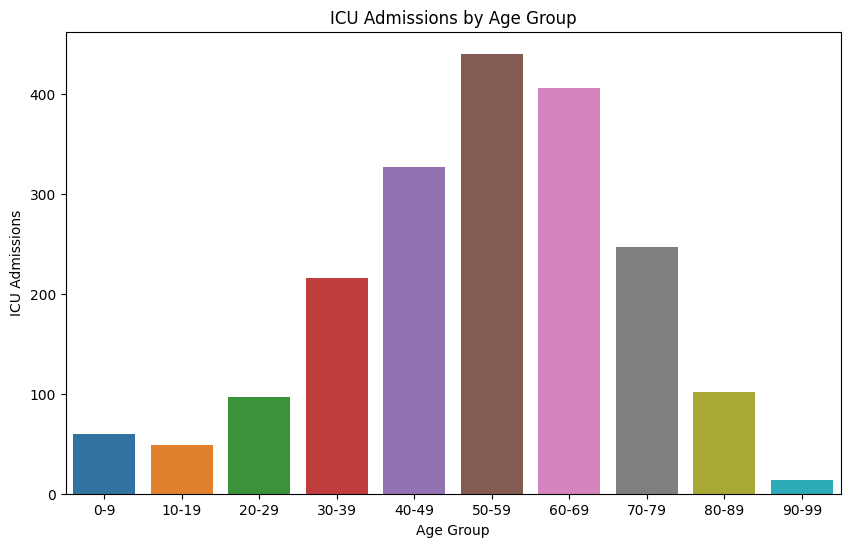

In [19]:
# 4. Plot the distribution of ICU admissions by age group

icu_admissions = data[data['ICU'] == 1]['age_group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=icu_admissions.index, y=icu_admissions.values)
plt.xlabel('Age Group')
plt.ylabel('ICU Admissions')
plt.title('ICU Admissions by Age Group')
plt.show()

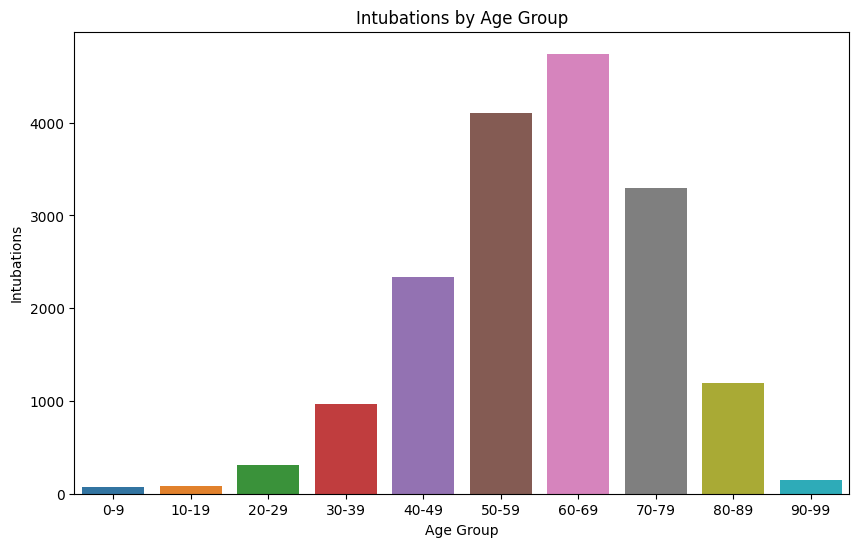

In [20]:
# 5. Plot the distribution of intubations by age group

intubations = data[data['INTUBED'] == 1]['age_group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=intubations.index, y=intubations.values)
plt.xlabel('Age Group')
plt.ylabel('Intubations')
plt.title('Intubations by Age Group')
plt.show()

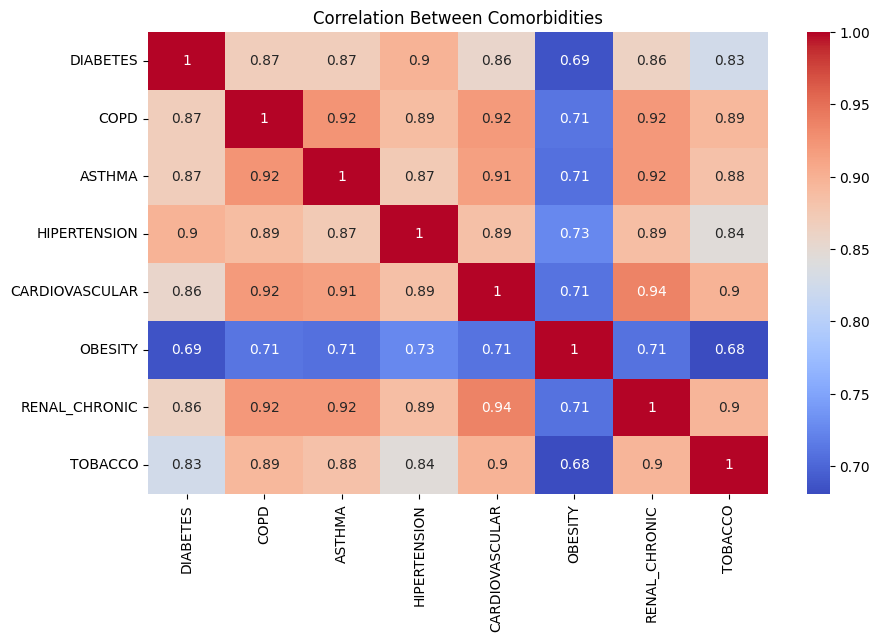

In [21]:
# 6. Plot the correlation matrix between comorbidities

comorbidities_corr = data[comorbidities].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(comorbidities_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Comorbidities')
plt.show()